#### Import the libraries

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Files

In [3]:
os.chdir('C:/Users/System Administrator/Desktop/CDS/Assignment_3')

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '.Rhistory',
 'CASP.csv',
 'dataset_Facebook.csv',
 'data_descripsion.txt',
 'Facebook_metrics.txt',
 'Krishnakanta_Maity_CDS_Assignment_3 - Copy - Copy.ipynb',
 'Krishnakanta_Maity_CDS_Assignment_3 - Copy.ipynb',
 'Krishnakanta_Maity_CDS_Assignment_3.ipynb',
 'Krishnakanta_Maity_ML_Assignment_3.ipynb',
 'Linear_Regression.ipynb',
 'Metro_Interstate_Traffic_Volume.csv',
 'transcoding_mesurment.tsv',
 'youtube_videos.tsv']

#### Print the names file to know the variable (attributes) of the data set

- RMSD-Size of the residue.
- F1 - Total surface area.
- F2 - Non polar exposed area.
- F3 - Fractional area of exposed non polar residue.
- F4 - Fractional area of exposed non polar part of residue.
- F5 - Molecular mass weighted exposed area.
- F6 - Average deviation from standard exposed area of residue.
- F7 - Euclidian distance.
- F8 - Secondary structure penalty.
- F9 - Spacial Distribution constraints (N,K Value).

#### Read the data file

In [5]:
casp = pd.read_csv('./CASP.csv')
casp.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


### EDA

In [6]:
casp.shape

(45730, 10)

In [7]:
# Missing value
casp.isnull().sum()

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64

In [8]:
casp.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


#### Train Test split

In [9]:
y = casp.RMSD
casp.insert(0, 'constant', np.ones(casp.shape[0]))
X = casp.drop(['RMSD'], axis = 1)

In [9]:
design_mat = X.iloc[:,1:X.shape[1]]
vif = pd.DataFrame()
vif['variable'] = design_mat.columns
vif['VIF'] = [variance_inflation_factor(design_mat.values, i) for i in range(design_mat.shape[1])]
vif

,variable,VIF
0,F1,2793.393763
1,F2,168.999278
2,F3,119.359750
3,F4,62.756775
4,F5,2124.420812
5,F6,136.224276
6,F7,7.272833
7,F8,4.839727
8,F9,69.577738


In [10]:
# filter the VIF values
vif.loc[vif.VIF > 15]

,variable,VIF
0,F1,2793.393763
1,F2,168.999278
2,F3,119.359750
3,F4,62.756775
4,F5,2124.420812
5,F6,136.224276
8,F9,69.577738


In [11]:
# X = X.drop(['F1','F2','F4','F5'], axis = 1)
# X.head()

In [12]:
for column in X.columns[1:]:
    X[column] = (X[column] - X[column].mean()) / X[column].std() 
y = (y-np.mean(y))

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
# Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}')

X_train: (41157, 10)
y_train: (41157,)


> ### OLS

In [15]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     1799.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:54:46   Log-Likelihood:            -1.2610e+05
No. Observations:               41157   AIC:                         2.522e+05
Df Residuals:                   41147   BIC:                         2.523e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.026     -0.203      0.8

In [16]:
# Analytical result
w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
print(w)

[-5.18809839e-03  6.28615225e+00  2.18660998e+00  1.10206953e+00
 -5.95035496e+00 -2.33065704e+00 -1.67967954e+00 -2.67807827e-01
  8.13686239e-01 -6.68229917e-01]


In [17]:
print(f'R_square value: {model.rsquared}')
print(f'Adj R_square value: {model.rsquared_adj}')
print(f'Testing accuracy: {r2_score(model.predict(X_test), y_test)}')

R_square value: 0.2823631265057809
Adj R_square value: 0.282206159245435
Testing accuracy: -1.6646710765968136


In [18]:
class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

X_train:(41157, 10)
y_train:(41157,)
Iteration: 0, Cost: 22.870
Iteration: 1, Cost: 22.731
Iteration: 2, Cost: 22.596
Iteration: 3, Cost: 22.464
Iteration: 4, Cost: 22.335
Iteration: 5, Cost: 22.209
Iteration: 6, Cost: 22.086
Iteration: 7, Cost: 21.966
Iteration: 8, Cost: 21.848
Iteration: 9, Cost: 21.733
Iteration: 10, Cost: 21.621
Iteration: 11, Cost: 21.511
Iteration: 12, Cost: 21.404
Iteration: 13, Cost: 21.299
Iteration: 14, Cost: 21.196
Iteration: 15, Cost: 21.096
Iteration: 16, Cost: 20.997
Iteration: 17, Cost: 20.901
Iteration: 18, Cost: 20.807
Iteration: 19, Cost: 20.715
Iteration: 20, Cost: 20.624
Iteration: 21, Cost: 20.536
Iteration: 22, Cost: 20.449
Iteration: 23, Cost: 20.365
Iteration: 24, Cost: 20.282
Iteration: 25, Cost: 20.200
Iteration: 26, Cost: 20.121
Iteration: 27, Cost: 20.043
Iteration: 28, Cost: 19.967
Iteration: 29, Cost: 19.892
Iteration: 30, Cost: 19.818
Iteration: 31, Cost: 19.747
Iteration: 32, Cost: 19.676
Iteration: 33, Cost: 19.607
Iteration: 34, Cost: 

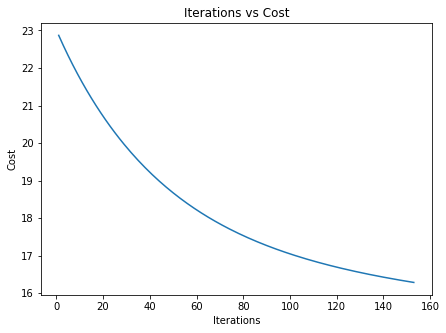

In [19]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=False)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

X_train:(41157, 10)
y_train:(41157,)
Iteration: 0, Cost: 23.305
Iteration: 1, Cost: 23.129
Iteration: 2, Cost: 22.957
Iteration: 3, Cost: 22.789
Iteration: 4, Cost: 22.625
Iteration: 5, Cost: 22.466
Iteration: 6, Cost: 22.311
Iteration: 7, Cost: 22.159
Iteration: 8, Cost: 22.011
Iteration: 9, Cost: 21.867
Iteration: 10, Cost: 21.726
Iteration: 11, Cost: 21.588
Iteration: 12, Cost: 21.454
Iteration: 13, Cost: 21.323
Iteration: 14, Cost: 21.194
Iteration: 15, Cost: 21.069
Iteration: 16, Cost: 20.947
Iteration: 17, Cost: 20.828
Iteration: 18, Cost: 20.711
Iteration: 19, Cost: 20.597
Iteration: 20, Cost: 20.486
Iteration: 21, Cost: 20.377
Iteration: 22, Cost: 20.271
Iteration: 23, Cost: 20.167
Iteration: 24, Cost: 20.065
Iteration: 25, Cost: 19.966
Iteration: 26, Cost: 19.869
Iteration: 27, Cost: 19.774
Iteration: 28, Cost: 19.681
Iteration: 29, Cost: 19.590
Iteration: 30, Cost: 19.502
Iteration: 31, Cost: 19.415
Iteration: 32, Cost: 19.330
Iteration: 33, Cost: 19.247
Iteration: 34, Cost: 

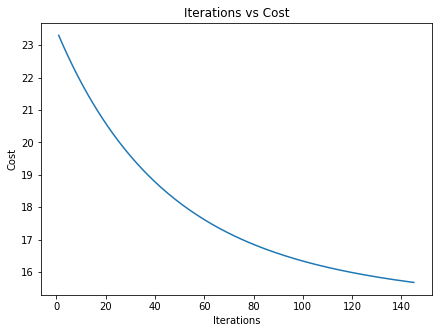

In [20]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=False)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

In [21]:
observed = y_test
predicted = seq_regressor.predict(X_test)
residual = observed - predicted

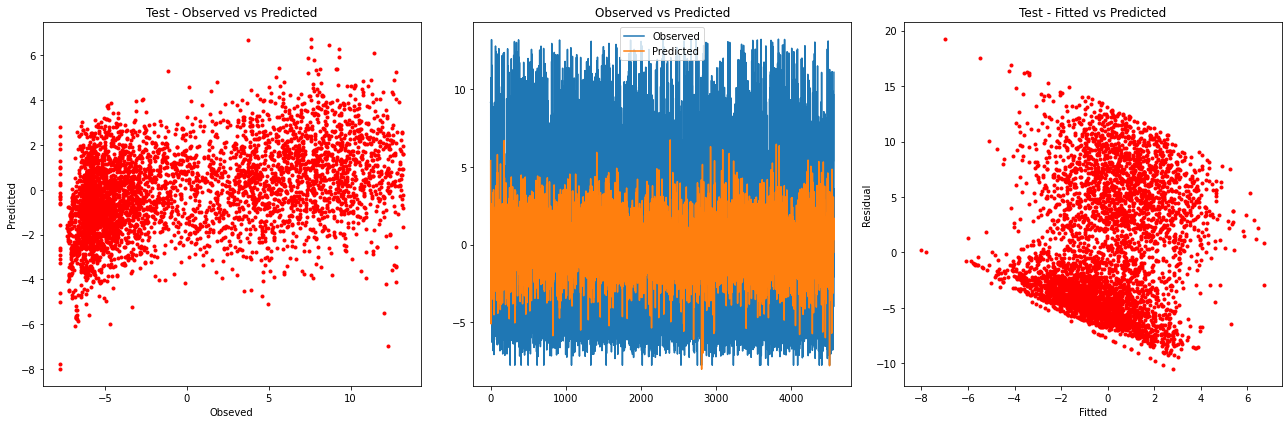

In [22]:
plt.subplots(figsize=(18, 6))
plt.subplot(1,3,1)
plt.plot(observed, predicted, 'r.')
plt.xlabel('Obseved'); plt.ylabel('Predicted')
plt.title('Test - Observed vs Predicted')
plt.subplot(1,3,2)
plt.plot(observed, label = 'Observed')
plt.plot(predicted, label = 'Predicted')
plt.title('Observed vs Predicted')
plt.legend(loc = 'best')
plt.subplot(1,3,3)
plt.plot(predicted, residual, 'r.')
plt.xlabel('Fitted'); plt.ylabel('Residual')
plt.title('Test - Fitted vs Predicted')
plt.tight_layout()